In [1]:
from bus import Location
import pandas as pd
from zipfile import ZipFile   
from datetime import datetime

In [2]:
memorial_union = Location(latlon = (43.076833, -89.399135))
union_south = Location(latlon = (43.071821, -89.408072))
print(memorial_union, union_south)
print("distance:", memorial_union.dist(union_south))

Location(xy=(-0.75, 0.15)) Location(xy=(-1.20, -0.20))
distance: 0.5682593522032543


In [ ]:
## BusDay:
import pandas as pd
from zipfile import ZipFile   
from datetime import datetime

class BusDay:
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("calendar.txt") as f:
            df = pd.read_csv(f)
        
    def __init__(self, datetime):
        self.datetime = datetime
        self.numtime = int(self.datetime.strftime("%Y%m%d"))
        self.day = self.datetime.strftime("%A").lower()
        self.calender = BusDay.df[BusDay.df.start_date <= self.numtime]
        self.calender = self.calender[self.calender.end_date >= self.numtime]
        self.calender = self.calender[self.calender[self.day] == 1]
        self.service_ids = list(self.calender['service_id'])
    

In [ ]:
bd = BusDay(datetime(2020, 2, 21))
bd.service_ids

In [ ]:
day = datetime(2020, 2, 21).strftime("%A").lower()
day

In [ ]:
now = datetime(2020, 2, 21).strftime("%Y%m%d")
now = int(now)
now

In [ ]:
datetime(2020, 2, 21).strftime("%Y%m%d")

## Trips

In [ ]:
with ZipFile('mmt_gtfs.zip') as zf:
      with zf.open("calendar.txt") as f:
            df = pd.read_csv(f)
df.head()

In [ ]:
with ZipFile('mmt_gtfs.zip') as zf:
    with zf.open("calendar_dates.txt") as f:
        df = pd.read_csv(f)
df.head()      

In [ ]:
with ZipFile('mmt_gtfs.zip') as zf:
    with zf.open("trips.txt") as f:
        df = pd.read_csv(f)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
# df['sele'] = df.service_id.apply(lambda x: True if '88' in x else False) # same function as the last code
# df = df[df.sele== True]
# df.drop('sele',axis = 1, inplace = True)
df[df.service_id.apply(lambda x: True if '88' in x else False)]

In [80]:
class BusDay:
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("calendar.txt") as f:
            calen = pd.read_csv(f)
    
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("trips.txt") as f:
            trips = pd.read_csv(f)
        
    def __init__(self, datetime):
        self.datetime = datetime
        self.numtime = int(self.datetime.strftime("%Y%m%d"))
        self.day = self.datetime.strftime("%A").lower()
        self.calender = BusDay.calen[BusDay.calen.start_date <= self.numtime]
        self.calender = self.calender[self.calender.end_date >= self.numtime]
        self.calender = self.calender[self.calender[self.day] == 1]
        self.service_ids = list(self.calender['service_id'])
    
    def get_trips(self, route = None):
        self.triptable = BusDay.trips
        if route != None:
            # self.triptable = self.triptable[self.triptable.service_id.apply(lambda x: True if str(route) in x else False)]
            self.triptable = self.triptable[self.triptable.route_short_name == route]
        
        self.triptable = self.triptable[self.triptable.service_id.isin(self.service_ids)].sort_values(by = 'trip_id', ascending = 1)
        self.triptable['bikes_allowed'] = self.triptable['bikes_allowed'].apply(lambda x: True if x==1 else False)
        self.triptable = self.triptable[['trip_id', 'route_short_name', 'bikes_allowed']].values.tolist()
        def to_Trip_object(item):
            trip_id,route_id,bikes_allowed = item
            return Trip(trip_id,route_id,bikes_allowed)
        
        self.triplist = list(map(to_Trip_object,self.triptable))
        return self.triplist

In [10]:
class Trip:
    def __init__(self, trip_id, route_id, bike_allowed):
        self.trip_id = trip_id
        self.route_id = route_id
        self.bike_allowed = bike_allowed
        
    def __repr__(self):
        return "Trip({}, {}, {})".format(self.trip_id, self.route_id, self.bike_allowed)
    

In [82]:
bd = BusDay(datetime(2020, 2, 22))
bd.service_ids

['88_SAT', '88_SAT:L', '88_SAT:S']

In [83]:
bd.get_trips(80)[:10]

[Trip(910490, 80, True),
 Trip(910492, 80, True),
 Trip(910493, 80, True),
 Trip(910494, 80, True),
 Trip(910495, 80, True),
 Trip(910496, 80, True),
 Trip(910497, 80, True),
 Trip(910498, 80, True),
 Trip(910499, 80, True),
 Trip(910500, 80, True)]

In [84]:
## improved BusDay
class BusDay:
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("calendar.txt") as f:
            calen = pd.read_csv(f)
    
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("trips.txt") as f:
            trips = pd.read_csv(f)
        
    def __init__(self, datetime):
        self.datetime = datetime
        self.numtime = int(self.datetime.strftime("%Y%m%d"))
        self.day = self.datetime.strftime("%A").lower()
        self.calender = BusDay.calen[BusDay.calen.start_date <= self.numtime]
        self.calender = self.calender[self.calender.end_date >= self.numtime]
        self.calender = self.calender[self.calender[self.day] == 1]
        self.service_ids = list(self.calender['service_id'])
        
        self.triptable = BusDay.trips
        self.triptable = self.triptable[self.triptable.service_id.isin(self.service_ids)].sort_values(by = 'trip_id', ascending = 1)

    
    def get_trips(self, route = None):
        # self.triptable = BusDay.trips
        if route != None:
            # self.triptable = self.triptable[self.triptable.service_id.apply(lambda x: True if str(route) in x else False)]
            self.triptable2 = self.triptable[self.triptable.route_short_name == route]
        
        self.triptable2['bikes_allowed'] = self.triptable2['bikes_allowed'].apply(lambda x: True if x==1 else False)
        self.triptable2 = self.triptable2[['trip_id', 'route_short_name', 'bikes_allowed']].values.tolist()
        def to_Trip_object(item):
            trip_id,route_id,bikes_allowed = item
            return Trip(trip_id,route_id,bikes_allowed)
        
        self.triplist = list(map(to_Trip_object,self.triptable2))
        return self.triplist


In [85]:
class Trip:
    def __init__(self, trip_id, route_id, bike_allowed):
        self.trip_id = trip_id
        self.route_id = route_id
        self.bike_allowed = bike_allowed
        
    def __repr__(self):
        return "Trip({}, {}, {})".format(self.trip_id, self.route_id, self.bike_allowed)
  

In [86]:
bd = BusDay(datetime(2020, 2, 22))
bd.service_ids

['88_SAT', '88_SAT:L', '88_SAT:S']

In [87]:
bd.get_trips(80)[:10] # run second time wrong!!!

/Users/zyxu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[Trip(910490, 80, True),
 Trip(910492, 80, True),
 Trip(910493, 80, True),
 Trip(910494, 80, True),
 Trip(910495, 80, True),
 Trip(910496, 80, True),
 Trip(910497, 80, True),
 Trip(910498, 80, True),
 Trip(910499, 80, True),
 Trip(910500, 80, True)]

In [88]:
def to_trip_object(item):
    trip_id,route_id,bikes_allowed = item
    return trip(trip_id,route_id,bikes_allowed)
list(map(to_trip_object,c))

NameError: name 'c' is not defined

## Stops

In [89]:
with ZipFile('mmt_gtfs.zip') as zf:
    with zf.open("stop_times.txt") as f:
        stoptime = pd.read_csv(f)
stoptime.head()

,trip_id,stop_sequence,stop_id,pickup_type,drop_off_type,arrival_time,departure_time,timepoint,stop_headsign,shape_dist_traveled
0,904927,1,2561,0,1,9:56:00,9:56:00,1,CAPITOL SQUARE,0.0210
1,904927,2,2605,0,0,9:56:55,9:56:55,0,CAPITOL SQUARE,0.1979
2,904927,3,2717,0,0,9:57:51,9:57:51,0,CAPITOL SQUARE,0.3775
3,904927,4,2921,0,0,9:58:51,9:58:51,0,CAPITOL SQUARE,0.5692
4,904927,5,133,0,0,10:00:00,10:00:00,1,CAPITOL SQUARE,0.7875


In [90]:
stoptime.shape

(533350, 10)

In [91]:
with ZipFile('mmt_gtfs.zip') as zf:
    with zf.open("stops.txt") as f:
        stops = pd.read_csv(f)
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,agency_id,jurisdiction_id,location_type,parent_station,relative_position,cardinal_direction,wheelchair_boarding,primary_street,address_range,cross_location
0,1110,1110,E Dayton & Wisconsin (WB),This EVENT/DETOUR ONLY stop (#1110) is westbou...,43.076428,-89.385920,MMT,CMAD,0,NaN,3,270.0,1,E Dayton,2,Wisconsin
1,1111,1111,W Doty & M L K Junior (EB),This EVENT/DETOUR ONLY stop (#1111) is eastbou...,43.072938,-89.382354,MMT,CMAD,0,NaN,3,90.0,1,W Doty,1,M L K Junior
2,1124,1124,S Fairchild & W Main (SB),This EVENT/DETOUR ONLY stop (#1124) is southbo...,43.072467,-89.385273,MMT,CMAD,0,NaN,3,180.0,1,S Fairchild,98,W Main
3,1135,1135,N Webster & E Mifflin (NB),This EVENT/DETOUR ONLY stop (#1135) is northbo...,43.077272,-89.383413,MMT,CMAD,0,NaN,1,0.0,1,N Webster,101,E Mifflin
4,1140,1140,E Washington & N Webster (WB),This EVENT/DETOUR ONLY stop (#1140) is westbou...,43.076390,-89.381930,MMT,CMAD,0,NaN,3,270.0,1,E Washington,200,N Webster


In [92]:
class BusDay:
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("calendar.txt") as f:
            calen = pd.read_csv(f)
        with zf.open("trips.txt") as f:
            trips = pd.read_csv(f)
        with zf.open("stop_times.txt") as f:
            stoptimes = pd.read_csv(f)
        with zf.open("stops.txt") as f:
            stops = pd.read_csv(f)  
        
    def __init__(self, datetime):
        self.datetime = datetime
        self.numtime = int(self.datetime.strftime("%Y%m%d"))
        self.day = self.datetime.strftime("%A").lower()
        self.calender = BusDay.calen[BusDay.calen.start_date <= self.numtime]
        self.calender = self.calender[self.calender.end_date >= self.numtime]
        self.calender = self.calender[self.calender[self.day] == 1]
        self.service_ids = list(self.calender['service_id'])
        
        self.triptable = BusDay.trips
        self.triptable = self.triptable[self.triptable.service_id.isin(self.service_ids)].sort_values(by = 'trip_id', ascending = 1)
        
        self.trip_id = self.triptable.trip_id
        self.stoptable = BusDay.stoptimes  ## stoptimes
        self.stoptable = self.stoptable[self.stoptable.trip_id.isin(self.trip_id)].sort_values(by = 'stop_id', ascending = 1) ## table of stoptimes
        
        self.stop_id = self.stoptable.stop_id
        self.stops = BusDay.stops ## info of stops location, no time/trip
        self.stops = self.stops[self.stops.stop_id.isin(self.stop_id)].sort_values(by = 'stop_id', ascending = 1)
        self.stops.loc[:,'wheelchair_boarding'] = self.stops['wheelchair_boarding'].apply(lambda x: True if x==1 else False)
    
    def get_trips(self, route = None):
        # self.triptable = BusDay.trips
        if route != None:
            # self.triptable = self.triptable[self.triptable.service_id.apply(lambda x: True if str(route) in x else False)]
            self.triptable2 = self.triptable[self.triptable.route_short_name == route]
        else:
            self.triptable2 = self.triptable
        
        self.triptable2.loc[:,'bikes_allowed'] = self.triptable2['bikes_allowed'].apply(lambda x: True if x==1 else False)
        self.triptable2 = self.triptable2[['trip_id', 'route_short_name', 'bikes_allowed']].values.tolist()
        def to_Trip_object(item):
            trip_id,route_id,bikes_allowed = item
            return Trip(trip_id,route_id,bikes_allowed)
        
        self.triplist = list(map(to_Trip_object,self.triptable2))
        return self.triplist
    
    def get_stops(self):
        self.stops2 = self.stops[['stop_id', 'stop_lat', 'stop_lon', 'wheelchair_boarding']].values.tolist()
        def to_Stop_object(item):
            stop_id, stop_lat, stop_lon, wheelchair_boarding = item
            Location_object = Location(latlon = (stop_lat, stop_lon))
            return Stop(stop_id,Location_object,wheelchair_boarding)
        self.stopslist = list(map(to_Stop_object, self.stops2))
        return self.stopslist

In [11]:
class Stop:
    def __init__(self, stop_id, location_object, wheelchair_boarding):
        self.stop_id = stop_id
        self.location_object = location_object
        self.wheelchair_boarding = wheelchair_boarding
    def __repr__(self):
        return "Stop({}, {}, {})".format(self.stop_id, self.location_object, self.wheelchair_boarding)

In [94]:
bd = BusDay(datetime(2020, 2, 22))
bd.service_ids

['88_SAT', '88_SAT:L', '88_SAT:S']

In [95]:
bd.get_stops()[:10]

[Stop(5, Location(xy=(-1.15, -0.26)), True),
 Stop(10, Location(xy=(-0.80, 0.09)), True),
 Stop(25, Location(xy=(-0.64, 0.07)), True),
 Stop(39, Location(xy=(-0.66, -0.19)), True),
 Stop(45, Location(xy=(-0.28, 0.26)), True),
 Stop(49, Location(xy=(-0.65, 0.06)), True),
 Stop(52, Location(xy=(-1.08, 0.10)), True),
 Stop(53, Location(xy=(-0.99, 0.08)), True),
 Stop(56, Location(xy=(-1.15, 0.14)), True),
 Stop(60, Location(xy=(-0.98, 0.09)), True)]

In [21]:
te = bd.get_stops()[:10]
te

[Stop(5, Location(xy=(-1.15, -0.26)), True),
 Stop(10, Location(xy=(-0.80, 0.09)), True),
 Stop(25, Location(xy=(-0.64, 0.07)), True),
 Stop(39, Location(xy=(-0.66, -0.19)), True),
 Stop(45, Location(xy=(-0.28, 0.26)), True),
 Stop(49, Location(xy=(-0.65, 0.06)), True),
 Stop(52, Location(xy=(-1.08, 0.10)), True),
 Stop(53, Location(xy=(-0.99, 0.08)), True),
 Stop(56, Location(xy=(-1.15, 0.14)), True),
 Stop(60, Location(xy=(-0.98, 0.09)), True)]

In [22]:
class BST:
    def __init__(self, stop_total):
        self.nodes = {}
    
    def _split(self, levels = 6, stop_list):
        self.levels = levels
        self.ver_split *= -1
        if self.edges >= 6:
            self.node = Node(stop_list)
        else:
            if self.ver_split = 1:
                self.node.val.sort(lambda stop_obj: stop_obj.location_object.x)
            else:
                self.node.val.sort(lambda stop_obj: stop_obj.location_object.y)
            
            self._split(levels, self.node.val[:len(self.root.val)//2])
            self._split(levels, self.node.val[len(self.root.val)//2:])
        
            
            
                
                

class Node:
    def __init__(self, stop_list):
        self.val = stoplist
        self.left = None
        self.right = None
        

SyntaxError: invalid syntax (<ipython-input-22-6e05bcb6b10a>, line 11)

In [24]:
class BST:
    def __init__(self, stop_total):
        self.nodes = {}
    
    
            
                
                

class Node:
    def __init__(self, stop_list, ver_split = 1, levels = 0):
        self.ver_split = ver_split
        self.levels = levels
        
        self.val = stop_list
        
        if self.ver_split = 1:
                self.val.sort(lambda stop_obj: stop_obj.location_object.x)
            else:
                self.val.sort(lambda stop_obj: stop_obj.location_object.y)
        if levels >= 5:
            self.left = Node(self.val[:len(self.root.val)//2], -ver_split, levels + 1)
            self.right = Node(self.root.val[len(self.root.val)//2:])   
        else:
            
            
            
            
        

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [25]:
class BusDay:
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("calendar.txt") as f:
            calen = pd.read_csv(f)
        with zf.open("trips.txt") as f:
            trips = pd.read_csv(f)
        with zf.open("stop_times.txt") as f:
            stoptimes = pd.read_csv(f)
        with zf.open("stops.txt") as f:
            stops = pd.read_csv(f)  
        
    def __init__(self, datetime):
        self.datetime = datetime
        self.numtime = int(self.datetime.strftime("%Y%m%d"))
        self.day = self.datetime.strftime("%A").lower()
        self.calender = BusDay.calen[BusDay.calen.start_date <= self.numtime]
        self.calender = self.calender[self.calender.end_date >= self.numtime]
        self.calender = self.calender[self.calender[self.day] == 1]
        self.service_ids = list(self.calender['service_id'])
        
        self.triptable = BusDay.trips
        self.triptable = self.triptable[self.triptable.service_id.isin(self.service_ids)].sort_values(by = 'trip_id', ascending = 1)
        
        self.trip_id = self.triptable.trip_id
        self.stoptable = BusDay.stoptimes  ## stoptimes
        self.stoptable = self.stoptable[self.stoptable.trip_id.isin(self.trip_id)].sort_values(by = 'stop_id', ascending = 1) ## table of stoptimes
        
        self.stop_id = self.stoptable.stop_id
        self.stops = BusDay.stops ## info of stops location, no time/trip
        self.stops = self.stops[self.stops.stop_id.isin(self.stop_id)].sort_values(by = 'stop_id', ascending = 1)
        self.stops.loc[:,'wheelchair_boarding'] = self.stops['wheelchair_boarding'].apply(lambda x: True if x==1 else False)
        
    
    def get_trips(self, route = None):
        # self.triptable = BusDay.trips
        if route != None:
            # self.triptable = self.triptable[self.triptable.service_id.apply(lambda x: True if str(route) in x else False)]
            self.triptable2 = self.triptable[self.triptable.route_short_name == route]
        else:
            self.triptable2 = self.triptable
        
        self.triptable2.loc[:,'bikes_allowed'] = self.triptable2['bikes_allowed'].apply(lambda x: True if x==1 else False)
        self.triptable2 = self.triptable2[['trip_id', 'route_short_name', 'bikes_allowed']].values.tolist()
        def to_Trip_object(item):
            trip_id,route_id,bikes_allowed = item
            return Trip(trip_id,route_id,bikes_allowed)
        
        self.triplist = list(map(to_Trip_object,self.triptable2))
        return self.triplist
    
    def get_stops(self):
        self.stops2 = self.stops[['stop_id', 'stop_lat', 'stop_lon', 'wheelchair_boarding']].values.tolist()
        def to_Stop_object(item):
            stop_id, stop_lat, stop_lon, wheelchair_boarding = item
            Location_object = Location(latlon = (stop_lat, stop_lon))
            return Stop(stop_id,Location_object,wheelchair_boarding)
        self.stopslist = list(map(to_Stop_object, self.stops2))
        return self.stopslist
    
    def get_stops_rect(self, xlim, ylim):
        stops = self.get_stops()
        BSTree = Node(stops)
        return BSTree.range_search(xlim, ylim)
        
    def get_stops_circ(self, loc, radius):
        stops = self.get_stops()
        BSTree = Node(stops)
        xlim = (loc[0] - radius, loc[0] + radius)
        ylim = (loc[1] - radius, loc[1] + radius)
        rec = BSTree.range_search(xlim, ylim)
        center = Location(xy = loc)
        return [stop for stop in rec if center.dist(stop.location_object) <= radius]


In [29]:
from graphviz import Graph, Digraph
class Node:
    def __init__(self, stop_list, ver_split = 1, levels = 0): 
        self.left = None
        self.right = None
        self.ver_split = ver_split
        self.leaf = True   ## added for draw_tree
        if ver_split == 1:
            stop_list.sort(key = lambda stop_obj: stop_obj.location_object.x)
            self.split_val = stop_list[len(stop_list)//2].location_object.x
        else:
            stop_list.sort(key = lambda stop_obj: stop_obj.location_object.y)
            self.split_val = stop_list[len(stop_list)//2].location_object.y
        if levels <= 1:
            #print(stop_list[:len(stop_list)//2],len(stop_list)//2)
            self.left = Node(stop_list[:len(stop_list)//2],  -ver_split, levels + 1)
            self.right = Node(stop_list[len(stop_list)//2:],  -ver_split, levels + 1)
            self.leaf = False
        
            
        self.val = stop_list
        
    def to_graphviz(self, g=None):
        if g == None:
            g = Digraph()
            
        # draw self
        g.node(repr(self.val))
    
        for label, child in [("L", self.left), ("R", self.right)]:
            if child != None:
                # draw child, recursively
                child.to_graphviz(g)
                
                # draw edge from self to child
                g.edge(repr(self.val), repr(child.val), label=label)
        return g
    
    def _repr_svg_(self):
        return self.to_graphviz()._repr_svg_()
    
    def range_search(self, xlim, ylim, results=None):
        if results == None:
            results = []

        if self.left == None and self.right == None:
            for obj in self.val:
                if xlim[0] <= obj.location_object.x <= xlim[1] and ylim[0] <= obj.location_object.y <= ylim[1]:
                    results.append(obj)
        else:
            lim = xlim if self.ver_split == 1 else ylim
            if lim[0] <= self.split_val:
                self.left.range_search(xlim, ylim, results)
            if lim[1] >= self.split_val:
                self.right.range_search(xlim, ylim, results)
        return results


In [30]:
no = Node(te)

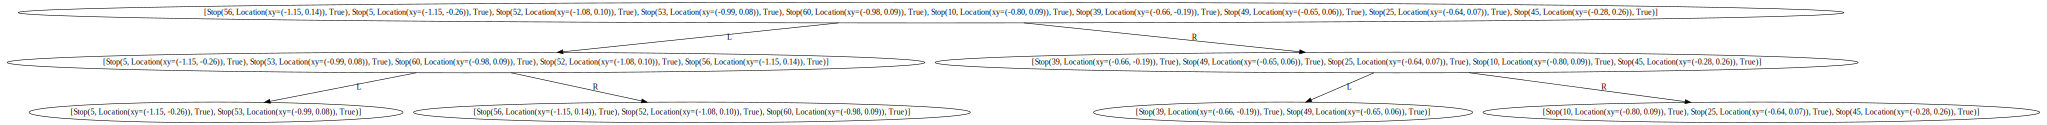

In [31]:
no

In [190]:
no.range_search((-1.15,-0.66),(-0.26, 0.08))

[Stop(5, Location(xy=(-1.15, -0.26)), True),
 Stop(53, Location(xy=(-0.99, 0.08)), True)]

In [191]:
bd = BusDay(datetime(2020, 2, 22))
bd.service_ids

['88_SAT', '88_SAT:L', '88_SAT:S']

## Scatter stops

In [193]:
class BusDay:
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("calendar.txt") as f:
            calen = pd.read_csv(f)
        with zf.open("trips.txt") as f:
            trips = pd.read_csv(f)
        with zf.open("stop_times.txt") as f:
            stoptimes = pd.read_csv(f)
        with zf.open("stops.txt") as f:
            stops = pd.read_csv(f)  
        
    def __init__(self, datetime):
        self.datetime = datetime
        self.numtime = int(self.datetime.strftime("%Y%m%d"))
        self.day = self.datetime.strftime("%A").lower()
        self.calender = BusDay.calen[BusDay.calen.start_date <= self.numtime]
        self.calender = self.calender[self.calender.end_date >= self.numtime]
        self.calender = self.calender[self.calender[self.day] == 1]
        self.service_ids = list(self.calender['service_id'])
        
        self.triptable = BusDay.trips
        self.triptable = self.triptable[self.triptable.service_id.isin(self.service_ids)].sort_values(by = 'trip_id', ascending = 1)
        
        self.trip_id = self.triptable.trip_id
        self.stoptable = BusDay.stoptimes  ## stoptimes
        self.stoptable = self.stoptable[self.stoptable.trip_id.isin(self.trip_id)].sort_values(by = 'stop_id', ascending = 1) ## table of stoptimes
        
        self.stop_id = self.stoptable.stop_id
        self.stops = BusDay.stops ## info of stops location, no time/trip
        self.stops = self.stops[self.stops.stop_id.isin(self.stop_id)].sort_values(by = 'stop_id', ascending = 1)
        self.stops.loc[:,'wheelchair_boarding'] = self.stops['wheelchair_boarding'].apply(lambda x: True if x==1 else False)
        
    
    def get_trips(self, route = None):
        # self.triptable = BusDay.trips
        if route != None:
            # self.triptable = self.triptable[self.triptable.service_id.apply(lambda x: True if str(route) in x else False)]
            self.triptable2 = self.triptable[self.triptable.route_short_name == route]
        else:
            self.triptable2 = self.triptable
        
        self.triptable2.loc[:,'bikes_allowed'] = self.triptable2['bikes_allowed'].apply(lambda x: True if x==1 else False)
        self.triptable2 = self.triptable2[['trip_id', 'route_short_name', 'bikes_allowed']].values.tolist()
        def to_Trip_object(item):
            trip_id,route_id,bikes_allowed = item
            return Trip(trip_id,route_id,bikes_allowed)
        
        self.triplist = list(map(to_Trip_object,self.triptable2))
        return self.triplist
    
    def get_stops(self):
        self.stops2 = self.stops[['stop_id', 'stop_lat', 'stop_lon', 'wheelchair_boarding']].values.tolist()
        def to_Stop_object(item):
            stop_id, stop_lat, stop_lon, wheelchair_boarding = item
            Location_object = Location(latlon = (stop_lat, stop_lon))
            return Stop(stop_id,Location_object,wheelchair_boarding)
        self.stopslist = list(map(to_Stop_object, self.stops2))
        return self.stopslist
    
    def get_stops_rect(self, xlim, ylim):
        stops = self.get_stops()
        BSTree = Node(stops)
        return BSTree.range_search(xlim, ylim)
        
    def get_stops_circ(self, loc, radius):
        stops = self.get_stops()
        BSTree = Node(stops)
        xlim = (loc[0] - radius, loc[0] + radius)
        ylim = (loc[1] - radius, loc[1] + radius)
        rec = BSTree.range_search(xlim, ylim)
        center = Location(xy = loc)
        return [stop for stop in rec if center.dist(stop.location_object) <= radius]
    
    def scatter_stops(self, ax):
        stop_df = pd.DataFrame(list(map(lambda item: [item.location_object.x, item.location_object.y, item.wheelchair_boarding],self.get_stops())),
             columns = ['x','y','wheelchair'])
        stop_df[stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = 'red', ax = ax)
        stop_df[~stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = '0.7', ax = ax)
        
    #def draw_tree(self, ax):
        

In [194]:
bd.get_stops()[:10]

[Stop(5, Location(xy=(-1.15, -0.26)), True),
 Stop(10, Location(xy=(-0.80, 0.09)), True),
 Stop(25, Location(xy=(-0.64, 0.07)), True),
 Stop(39, Location(xy=(-0.66, -0.19)), True),
 Stop(45, Location(xy=(-0.28, 0.26)), True),
 Stop(49, Location(xy=(-0.65, 0.06)), True),
 Stop(52, Location(xy=(-1.08, 0.10)), True),
 Stop(53, Location(xy=(-0.99, 0.08)), True),
 Stop(56, Location(xy=(-1.15, 0.14)), True),
 Stop(60, Location(xy=(-0.98, 0.09)), True)]

In [195]:
import matplotlib
%matplotlib inline
import pandas as pd
x_cor = [item.location_object.x for item in bd.get_stops()[:10]]
y_cor = [item.location_object.y for item in bd.get_stops()[:10]]
wheel = [item.wheelchair_boarding for item in bd.get_stops()[:10]]

In [196]:
[x,y,z for x,y,z in bd.get_stops()[:10]]

SyntaxError: invalid syntax (<ipython-input-196-aa40dc56c7e9>, line 1)

In [197]:
list(map(lambda item: [item.location_object.x, item.location_object.y, item.wheelchair_boarding],bd.get_stops()[:10]))

[[-1.1459349874742466, -0.2579529613805489, True],
 [-0.8015644022866889, 0.08630653151111423, True],
 [-0.6396678613047899, 0.06959758701037488, True],
 [-0.6596905799387551, -0.1924980878823983, True],
 [-0.28036849670704705, 0.2623028105687797, True],
 [-0.652125321009811, 0.05841226052622739, True],
 [-1.079259839154572, 0.09997748610250845, True],
 [-0.9895863037145515, 0.07581165727958972, True],
 [-1.1539541618895013, 0.13581195798619117, True],
 [-0.9783897205414149, 0.09065638069978421, True]]

In [198]:
stop_df = pd.DataFrame(list(map(lambda item: [item.location_object.x, item.location_object.y, item.wheelchair_boarding],bd.get_stops())),
             columns = ['x','y','wheelchair'])

In [199]:
stop_df[stop_df['wheelchair']==False]

,x,y,wheelchair
16,-0.191351,0.195536,False
47,-0.481504,-1.907927,False
65,-0.282840,-1.438833,False
66,-0.004993,-2.442751,False
82,-1.007138,-0.343293,False
...,...,...,...
1314,1.870788,3.948558,False
1317,3.463930,3.204527,False
1320,2.381644,3.174147,False
1387,4.163061,1.834394,False


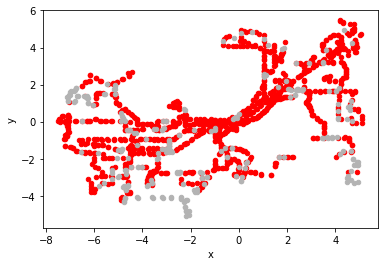

In [200]:
ax = stop_df[stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = 'red')
stop_df[~stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = '0.7', ax = ax)

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
class WrapAx:
    def __init__(self, ax):
        self.ax = ax
        # key: color: list of vals
        self.x = dict()
        self.y = dict()
        self.vlines = []
        self.hlines = []

    def plot(self, *args, **kwargs):
        # Example call: ax.plot((x, x), (y1, y2), 'y', lw=3, zorder=-10)
        if len(args) >= 2 and isinstance(args[0], tuple) and isinstance(args[1], tuple):
            if args[0][0] == args[0][1]:
                # x values are the same, so it is vertical
                self.vlines.append(args[0][0])
            elif args[1][0] == args[1][1]:
                # y values are the same, so it is horizontal
                self.hlines.append(args[1][0])

    def scatter(self, x, y, *args, **kwargs):
        color = kwargs["c"][0]
        if not color in self.x:
            self.x[color] = []
            self.y[color] = []
        self.x[color].extend(x)
        self.y[color].extend(y)
        self.ax.scatter(x, y, *args, **kwargs)

    def __getattr__(self, attr):
        return getattr(self.ax, attr)
ax = WrapAx(ax)

In [202]:
stop_df[stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = 'red', ax = ax)
stop_df[~stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = '0.7', ax = ax)

In [203]:
bd = BusDay(datetime(2020, 2, 22))
bd.scatter_stops(ax)

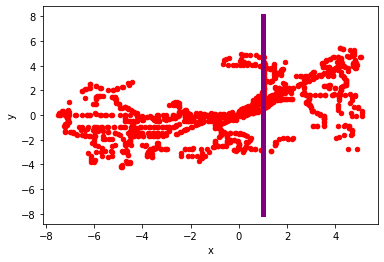

In [204]:
ax = stop_df[stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = 'red')
ax.plot((1, 1), (-8, 8), lw=5, color="purple")

In [205]:
ax.get_xlim()

(-8.12343363603767, 5.751523879455499)

In [206]:
a=None

a=2 if a==None else a
a

2

Draw tree:

In [12]:
from graphviz import Graph, Digraph
class Node:
    def __init__(self, stop_list, ver_split = 1, levels = 0): 
        self.left = None
        self.right = None
        self.ver_split = ver_split
        self.leaf = True   ## added for draw_tree
        if ver_split == 1:
            stop_list.sort(key = lambda stop_obj: stop_obj.location_object.x)
            self.split_val = stop_list[len(stop_list)//2].location_object.x
        else:
            stop_list.sort(key = lambda stop_obj: stop_obj.location_object.y)
            self.split_val = stop_list[len(stop_list)//2].location_object.y
        if levels <= 6:
            #print(stop_list[:len(stop_list)//2],len(stop_list)//2)
            self.left = Node(stop_list[:len(stop_list)//2],  -ver_split, levels + 1)
            self.right = Node(stop_list[len(stop_list)//2:],  -ver_split, levels + 1) 
            self.leaf = False   ## added for draw_tree
        
        self_levels = levels
        self.val = stop_list
        
    def to_graphviz(self, g=None):
        if g == None:
            g = Digraph()
            
        # draw self
        g.node(repr(self.val))
    
        for label, child in [("L", self.left), ("R", self.right)]:
            if child != None:
                # draw child, recursively
                child.to_graphviz(g)
                
                # draw edge from self to child
                g.edge(repr(self.val), repr(child.val), label=label)
        return g
    
    def _repr_svg_(self):
        return self.to_graphviz()._repr_svg_()
    
    def range_search(self, xlim, ylim, results=None):
        if results == None:
            results = []

        if self.left == None and self.right == None:
            for obj in self.val:
                if xlim[0] <= obj.location_object.x <= xlim[1] and ylim[0] <= obj.location_object.y <= ylim[1]:
                    results.append(obj)
        else:
            lim = xlim if self.ver_split == 1 else ylim
            if lim[0] <= self.split_val:
                self.left.range_search(xlim, ylim, results)
            if lim[1] >= self.split_val:
                self.right.range_search(xlim, ylim, results)
        return results
    
    def draw_tree(self, ax, lw = 10, xlim = None, ylim = None):
        if self.leaf == True:
            return
        xlim = ax.get_xlim() if xlim == None else xlim
        ylim = ax.get_ylim() if ylim == None else ylim
        
        if self.ver_split == 1:
            xlim_left = xlim[0]
            xlim_mid = self.split_val
            xlim_right = xlim[1]
            
            self.left.draw_tree(ax, lw = lw/2, xlim = (xlim_left,xlim_mid),ylim = ylim)
            self.right.draw_tree(ax, lw = lw/2, xlim = (xlim_mid,xlim_right),ylim = ylim)
            
            ax.plot((self.split_val,self.split_val),ylim,lw=lw, color="purple",zorder=-100)

        else:
            ylim_left = ylim[0]
            ylim_mid = self.split_val
            ylim_right = ylim[1]
            
            self.left.draw_tree(ax, lw = lw/2, xlim = xlim,ylim = (ylim_left,ylim_mid))
            self.right.draw_tree(ax, lw = lw/2, xlim = xlim,ylim = (ylim_mid,ylim_right))
            ax.plot(xlim,(self.split_val,self.split_val),lw = lw, color="purple", zorder=-10)
        
            
        
        


In [13]:
class BusDay:
    with ZipFile('mmt_gtfs.zip') as zf:
        with zf.open("calendar.txt") as f:
            calen = pd.read_csv(f)
        with zf.open("trips.txt") as f:
            trips = pd.read_csv(f)
        with zf.open("stop_times.txt") as f:
            stoptimes = pd.read_csv(f)
        with zf.open("stops.txt") as f:
            stops = pd.read_csv(f)  
        
    def __init__(self, datetime):
        self.datetime = datetime
        self.numtime = int(self.datetime.strftime("%Y%m%d"))
        self.day = self.datetime.strftime("%A").lower()
        self.calender = BusDay.calen[BusDay.calen.start_date <= self.numtime]
        self.calender = self.calender[self.calender.end_date >= self.numtime]
        self.calender = self.calender[self.calender[self.day] == 1]
        self.service_ids = list(self.calender['service_id'])
        
        self.triptable = BusDay.trips
        self.triptable = self.triptable[self.triptable.service_id.isin(self.service_ids)].sort_values(by = 'trip_id', ascending = 1)
        
        self.trip_id = self.triptable.trip_id
        self.stoptable = BusDay.stoptimes  ## stoptimes
        self.stoptable = self.stoptable[self.stoptable.trip_id.isin(self.trip_id)].sort_values(by = 'stop_id', ascending = 1) ## table of stoptimes
        
        self.stop_id = self.stoptable.stop_id
        self.stops = BusDay.stops ## info of stops location, no time/trip
        self.stops = self.stops[self.stops.stop_id.isin(self.stop_id)].sort_values(by = 'stop_id', ascending = 1)
        self.stops.loc[:,'wheelchair_boarding'] = self.stops['wheelchair_boarding'].apply(lambda x: True if x==1 else False)
        
    
    def get_trips(self, route = None):
        # self.triptable = BusDay.trips
        if route != None:
            # self.triptable = self.triptable[self.triptable.service_id.apply(lambda x: True if str(route) in x else False)]
            self.triptable2 = self.triptable[self.triptable.route_short_name == route]
        else:
            self.triptable2 = self.triptable
        
        self.triptable2.loc[:,'bikes_allowed'] = self.triptable2['bikes_allowed'].apply(lambda x: True if x==1 else False)
        self.triptable2 = self.triptable2[['trip_id', 'route_short_name', 'bikes_allowed']].values.tolist()
        def to_Trip_object(item):
            trip_id,route_id,bikes_allowed = item
            return Trip(trip_id,route_id,bikes_allowed)
        
        self.triplist = list(map(to_Trip_object,self.triptable2))
        return self.triplist
    
    def get_stops(self):
        self.stops2 = self.stops[['stop_id', 'stop_lat', 'stop_lon', 'wheelchair_boarding']].values.tolist()
        def to_Stop_object(item):
            stop_id, stop_lat, stop_lon, wheelchair_boarding = item
            Location_object = Location(latlon = (stop_lat, stop_lon))
            return Stop(stop_id,Location_object,wheelchair_boarding)
        self.stopslist = list(map(to_Stop_object, self.stops2))
        return self.stopslist
    
    def get_stops_rect(self, xlim, ylim):
        stops = self.get_stops()
        BSTree = Node(stops)
        return BSTree.range_search(xlim, ylim)
        
    def get_stops_circ(self, loc, radius):
        stops = self.get_stops()
        BSTree = Node(stops)
        xlim = (loc[0] - radius, loc[0] + radius)
        ylim = (loc[1] - radius, loc[1] + radius)
        rec = BSTree.range_search(xlim, ylim)
        center = Location(xy = loc)
        return [stop for stop in rec if center.dist(stop.location_object) <= radius]
    
    def scatter_stops(self, ax):
        stop_df = pd.DataFrame(list(map(lambda item: [item.location_object.x, item.location_object.y, item.wheelchair_boarding],self.get_stops())),
             columns = ['x','y','wheelchair'])
        stop_df[stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = 'red', ax = ax, s=2)
        stop_df[~stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = '0.7', ax = ax,s=2)
        
    def draw_tree(self, ax):
        stops = self.get_stops()
        BSTree = Node(stops)
        BSTree.draw_tree(ax)

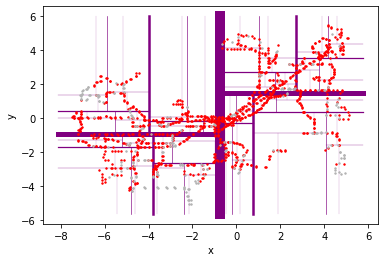

In [14]:
bd = BusDay(datetime(2020, 2, 22))
ax = plt.axes()
bd.scatter_stops(ax)
bd.draw_tree(ax)

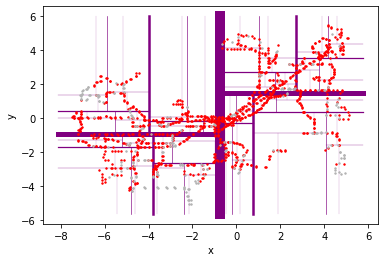

In [16]:
bd = BusDay(datetime(2020, 2, 22))
ax = plt.axes()
stop_df = pd.DataFrame(list(map(lambda item: [item.location_object.x, item.location_object.y, item.wheelchair_boarding],bd.get_stops())),
             columns = ['x','y','wheelchair'])
stop_df[stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = 'red',s=2,ax=ax)
stop_df[~stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = '0.7',s=2, ax = ax)
stops = bd.get_stops()
BSTree = Node(stops)
BSTree.draw_tree(ax)

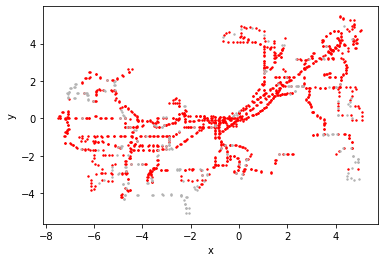

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
class WrapAx:
    def __init__(self, ax):
        self.ax = ax
        # key: color: list of vals
        self.x = dict()
        self.y = dict()
        self.vlines = []
        self.hlines = []

    def plot(self, *args, **kwargs):
        # Example call: ax.plot((x, x), (y1, y2), 'y', lw=3, zorder=-10)
        if len(args) >= 2 and isinstance(args[0], tuple) and isinstance(args[1], tuple):
            if args[0][0] == args[0][1]:
                # x values are the same, so it is vertical
                self.vlines.append(args[0][0])
            elif args[1][0] == args[1][1]:
                # y values are the same, so it is horizontal
                self.hlines.append(args[1][0])

    def scatter(self, x, y, *args, **kwargs):
        color = kwargs["c"][0]
        if not color in self.x:
            self.x[color] = []
            self.y[color] = []
        self.x[color].extend(x)
        self.y[color].extend(y)
        self.ax.scatter(x, y, *args, **kwargs)

    def __getattr__(self, attr):
        return getattr(self.ax, attr)

ax = WrapAx(ax)
# bd = BusDay(datetime(2020, 2, 22))
# stop_df[stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = 'red',s=2, ax=ax)
# stop_df[~stop_df['wheelchair']].plot.scatter(x = 'x',y = 'y', c = '0.7',s=2, ax = ax)
# stops = bd.get_stops()
# BSTree = Node(stops)
# BSTree.draw_tree(ax)

bd = BusDay(datetime(2020, 2, 22))
bd.scatter_stops(ax)
bd.draw_tree(ax)